# Information

- **step:** Represents the time step or sequence of the transaction.
- **type:** Indicates the type of transaction (e.g., PAYMENT).
- **amount:** Denotes the amount involved in the transaction.
- **nameOrig:** Refers to the originator's name or identifier.
- **oldbalanceOrg:** Represents the original balance before the transaction from the originator.
- **newbalanceOrig:** Indicates the new balance after the transaction for the originator.
- **nameDest:** Refers to the destination's name or identifier.
- **oldbalanceDest:** Represents the original balance before the transaction at the destination.
- **newbalanceDest:** Indicates the new balance after the transaction at the destination.
- **isFraud:** Binary indicator (0 or 1) representing whether the transaction is fraudulent.
- **isFlaggedFraud:** Binary indicator (0 or 1) representing whether the transaction is flagged as fraud.


In [ ]:
# Import Important Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('/content/PS_20174392719_1491204439457_test.csv')

In [4]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,45,TRANSFER,213983.59,C286239409,213983.59,0.0,C151804423,0.0,0.0,1,0


In [5]:
df.shape

(7557, 11)

In [6]:
df['isFlaggedFraud'].value_counts()

0    7557
Name: isFlaggedFraud, dtype: int64

In [7]:
df['isFraud'].value_counts()

0    6940
1     617
Name: isFraud, dtype: int64

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,7557.000000,7.557000e+03,7.557000e+03,7.557000e+03,7.557000e+03,7.557000e+03,7557.000000,7557.0
mean,92.186582,2.265043e+05,9.951649e+05,9.026287e+05,8.483901e+05,9.587575e+05,0.081646,0.0
std,7.997460,7.584711e+05,2.949658e+06,2.924442e+06,2.127269e+06,2.271870e+06,0.273843,0.0
min,45.000000,2.340000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,94.000000,7.290790e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,94.000000,3.305067e+04,2.061000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
75%,94.000000,1.807606e+05,1.520980e+05,7.680285e+04,6.902906e+05,8.410530e+05,0.000000,0.0
max,95.000000,1.000000e+07,2.610000e+07,2.620000e+07,3.040000e+07,3.030000e+07,1.000000,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            7557 non-null   int64  
 1   type            7557 non-null   object 
 2   amount          7557 non-null   float64
 3   nameOrig        7557 non-null   object 
 4   oldbalanceOrg   7557 non-null   float64
 5   newbalanceOrig  7557 non-null   float64
 6   nameDest        7557 non-null   object 
 7   oldbalanceDest  7557 non-null   float64
 8   newbalanceDest  7557 non-null   float64
 9   isFraud         7557 non-null   int64  
 10  isFlaggedFraud  7557 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 649.6+ KB


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Exploratory Data Analysis (EDA)

<Axes: >

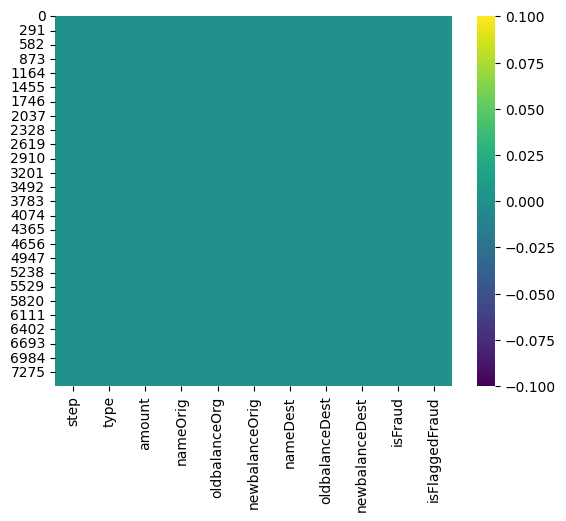

In [11]:
sns.heatmap(df.isnull(),cmap='viridis')

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,45,TRANSFER,213983.59,C286239409,213983.59,0.0,C151804423,0.00,0.00,1,0
1,45,CASH_OUT,213983.59,C578474227,213983.59,0.0,C265601701,0.00,213983.59,1,0
2,45,TRANSFER,217255.97,C1481880227,217255.97,0.0,C948441746,0.00,0.00,1,0
3,45,CASH_OUT,217255.97,C1291131466,217255.97,0.0,C1786011910,2115234.86,2332490.82,1,0
4,45,TRANSFER,1069508.42,C1582972194,1069508.42,0.0,C284364603,0.00,0.00,1,0


In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(7557, 11)

In [15]:
column=df.columns
column

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
for i in column:
  print(f'{i}:{df[i].unique()}')

step:[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92
 93 94 95]
type:['TRANSFER' 'CASH_OUT' 'PAYMENT' 'CASH_IN' 'DEBIT']
amount:[ 213983.59  217255.97 1069508.42 ...    5164.9    27282.16    2576.51]
nameOrig:['C286239409' 'C578474227' 'C1481880227' ... 'C167617867' 'C1243849932'
 'C886083303']
oldbalanceOrg:[ 213983.59  217255.97 1069508.42 ...  107245.     20403.     20003.  ]
newbalanceOrig:[      0.   8594065.09  987591.59 ...  198638.04  102080.1    17426.49]
nameDest:['C151804423' 'C265601701' 'C948441746' ... 'M34799897' 'M1941901055'
 'M948200857']
oldbalanceDest:[      0.   2115234.86  172254.   ...  149899.     25599.38  207735.96]
newbalanceDest:[      0.    213983.59 2332490.82 ...  312861.66  251280.56   70983.92]
isFraud:[1 0]
isFlaggedFraud:[0]


In [17]:
df.drop('isFlaggedFraud', inplace=True, axis=1)

In [18]:
df.shape

(7557, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            7557 non-null   int64  
 1   type            7557 non-null   object 
 2   amount          7557 non-null   float64
 3   nameOrig        7557 non-null   object 
 4   oldbalanceOrg   7557 non-null   float64
 5   newbalanceOrig  7557 non-null   float64
 6   nameDest        7557 non-null   object 
 7   oldbalanceDest  7557 non-null   float64
 8   newbalanceDest  7557 non-null   float64
 9   isFraud         7557 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 590.5+ KB


<Axes: xlabel='type', ylabel='count'>

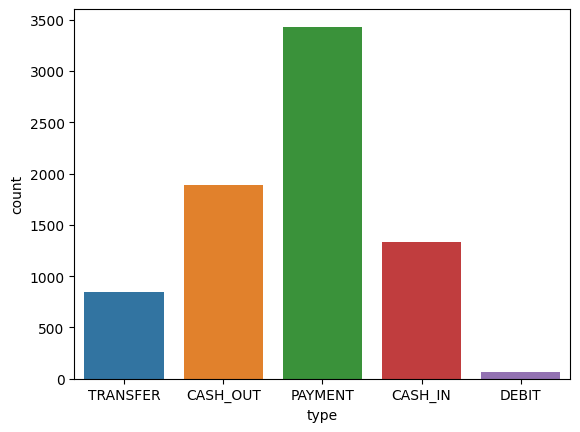

In [20]:
sns.countplot(x=df['type'])

<Axes: xlabel='type', ylabel='isFraud'>

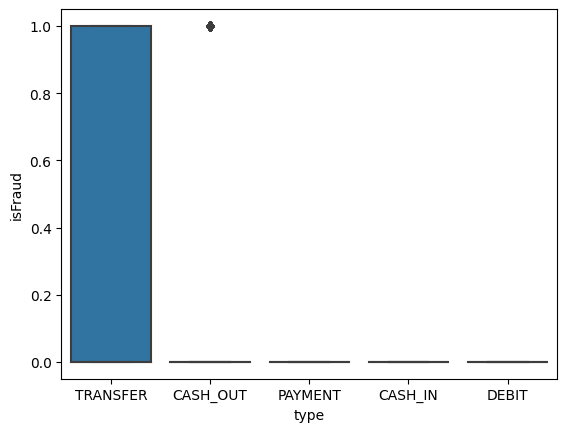

In [21]:
sns.boxplot(x='type',y='isFraud',data=df)

<Axes: xlabel='amount', ylabel='Count'>

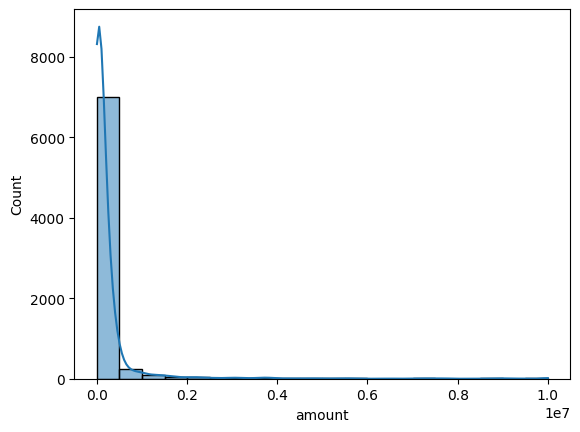

In [22]:
sns.histplot(df['amount'],bins=20,kde=True)

# Data Preprocessing

In [23]:
df['isFraud'].value_counts()

0    6940
1     617
Name: isFraud, dtype: int64

In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,45,TRANSFER,213983.59,C286239409,213983.59,0.0,C151804423,0.00,0.00,1
1,45,CASH_OUT,213983.59,C578474227,213983.59,0.0,C265601701,0.00,213983.59,1
2,45,TRANSFER,217255.97,C1481880227,217255.97,0.0,C948441746,0.00,0.00,1
3,45,CASH_OUT,217255.97,C1291131466,217255.97,0.0,C1786011910,2115234.86,2332490.82,1
4,45,TRANSFER,1069508.42,C1582972194,1069508.42,0.0,C284364603,0.00,0.00,1


In [25]:
df = pd.get_dummies(df, columns=['type', 'nameDest', 'nameOrig'], drop_first=True, sparse=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Columns: 15026 entries, step to nameOrig_C999748524
dtypes: Sparse[uint8, 0](15019), float64(5), int64(2)
memory usage: 517.6 KB


In [27]:
X=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
X_train.shape, y_train.shape ,X_test.shape

((6045, 15025), (6045,), (1512, 15025))

In [30]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [31]:
X_train_resampled.shape , y_train_resampled.shape

((11102, 15025), (11102,))

In [ ]:
y_train_resampled.value_counts()

0    5551
1    5551
Name: isFraud, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
X_train_scaled

array([[ 0.81411854, -0.28867753, -0.44535627, ..., -0.00949115,
         0.        ,  0.        ],
       [ 0.81411854, -0.44810037, -0.42645133, ..., -0.00949115,
         0.        ,  0.        ],
       [ 0.81411854, -0.44929822, -0.43757143, ..., -0.00949115,
         0.        ,  0.        ],
       ...,
       [-2.01996195, -0.41646348, -0.41850553, ..., -0.00949115,
         0.        ,  0.        ],
       [ 0.02321236, -0.11215674, -0.22845126, ..., -0.00949115,
         0.        ,  0.        ],
       [-1.22905577, -0.03599892, -0.18088703, ..., -0.00949115,
         0.        ,  0.        ]])

# Model Building  

In [32]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
mlc = MLPClassifier()
adc = AdaBoostClassifier()

In [ ]:
for model in [lr, dtc, rfc, gnb, knn, gbc, xgb, mlc, adc]:
    print('Model Name  --------------------------------------------', model)

    # Train the model on the scaled training set
    abc = model.fit(X_train_scaled, y_train_resampled)

    # Predictions on the training set
    Y_pred_train = abc.predict(X_train_scaled)

    # Predictions on the original test set
    Y_pred_test = abc.predict(X_test)

    # Accuracy scores
    As_train = accuracy_score(Y_pred_train, y_train_resampled)
    As_test = accuracy_score(Y_pred_test, y_test)

    # Confusion matrix and classification report on the original test set
    cm = confusion_matrix(Y_pred_test, y_test)
    cr = classification_report(Y_pred_test, y_test)

    # Print results
    print("training Accuracy score \n", As_train)
    print("=========="*3)
    print("testing Accuracy score \n", As_test)
    print("=========="*3)
    print("Confusion matrix \n", cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n", cr)
    print("=========="*3)

Model Name  -------------------------------------------- LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 1.0
testing Accuracy score 
 0.6924603174603174
Confusion matrix 
 [[941  17]
 [448 106]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.68      0.98      0.80       958
           1       0.86      0.19      0.31       554

    accuracy                           0.69      1512
   macro avg       0.77      0.59      0.56      1512
weighted avg       0.75      0.69      0.62      1512

Model Name  -------------------------------------------- DecisionTreeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dis

training Accuracy score 
 1.0
testing Accuracy score 
 0.08134920634920635
Confusion matrix 
 [[   0    0]
 [1389  123]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.08      0.15      1512

    accuracy                           0.08      1512
   macro avg       0.50      0.04      0.08      1512
weighted avg       1.00      0.08      0.15      1512

Model Name  -------------------------------------------- RandomForestClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dis

training Accuracy score 
 1.0
testing Accuracy score 
 0.9186507936507936
Confusion matrix 
 [[1389  123]
 [   0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1512
           1       0.00      0.00      0.00         0

    accuracy                           0.92      1512
   macro avg       0.50      0.46      0.48      1512
weighted avg       1.00      0.92      0.96      1512

Model Name  -------------------------------------------- GaussianNB()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 1.0
testing Accuracy score 
 0.7407407407407407
Confusion matrix 
 [[1008   11]
 [ 381  112]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      1019
           1       0.91      0.23      0.36       493

    accuracy                           0.74      1512
   macro avg       0.82      0.61      0.60      1512
weighted avg       0.79      0.74      0.68      1512

Model Name  -------------------------------------------- KNeighborsClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 0.5
testing Accuracy score 
 0.7466931216931217
Confusion matrix 
 [[1042   36]
 [ 347   87]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.75      0.97      0.84      1078
           1       0.71      0.20      0.31       434

    accuracy                           0.75      1512
   macro avg       0.73      0.58      0.58      1512
weighted avg       0.74      0.75      0.69      1512

Model Name  -------------------------------------------- GradientBoostingClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10

training Accuracy score 
 0.9996397045577373
testing Accuracy score 
 0.9186507936507936
Confusion matrix 
 [[1389  123]
 [   0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1512
           1       0.00      0.00      0.00         0

    accuracy                           0.92      1512
   macro avg       0.50      0.46      0.48      1512
weighted avg       1.00      0.92      0.96      1512

Model Name  -------------------------------------------- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=Non

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 1.0
testing Accuracy score 
 0.9186507936507936
Confusion matrix 
 [[1389  123]
 [   0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1512
           1       0.00      0.00      0.00         0

    accuracy                           0.92      1512
   macro avg       0.50      0.46      0.48      1512
weighted avg       1.00      0.92      0.96      1512

Model Name  -------------------------------------------- MLPClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 1.0
testing Accuracy score 
 0.6150793650793651
Confusion matrix 
 [[823  16]
 [566 107]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.59      0.98      0.74       839
           1       0.87      0.16      0.27       673

    accuracy                           0.62      1512
   macro avg       0.73      0.57      0.50      1512
weighted avg       0.72      0.62      0.53      1512

Model Name  -------------------------------------------- AdaBoostClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 1.0
testing Accuracy score 
 0.9186507936507936
Confusion matrix 
 [[1389  123]
 [   0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1512
           1       0.00      0.00      0.00         0

    accuracy                           0.92      1512
   macro avg       0.50      0.46      0.48      1512
weighted avg       1.00      0.92      0.96      1512



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#scaler=MinMaxScaler()
#x_train_scaled=scaler.fit_transform(X_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [33]:
for model in [lr, dtc, rfc, gnb, knn, gbc, xgb, mlc, adc]:
    print('Model Name  --------------------------------------------', model)

    # Train the model on the scaled training set
    abc = model.fit(X_train_resampled, y_train_resampled)

    # Predictions on the training set
    Y_pred_train = abc.predict(X_train_resampled)

    # Predictions on the original test set
    Y_pred_test = abc.predict(X_test)

    # Accuracy scores
    As_train = accuracy_score(Y_pred_train, y_train_resampled)
    As_test = accuracy_score(Y_pred_test, y_test)

    # Confusion matrix and classification report on the original test set
    cm = confusion_matrix(Y_pred_test, y_test)
    cr = classification_report(Y_pred_test, y_test)

    # Print results
    print("training Accuracy score \n", As_train)
    print("=========="*3)
    print("testing Accuracy score \n", As_test)
    print("=========="*3)
    print("Confusion matrix \n", cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n", cr)
    print("=========="*3)

Model Name  -------------------------------------------- LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 0.967032967032967
testing Accuracy score 
 0.9900793650793651
Confusion matrix 
 [[1379    5]
 [  10  118]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1384
           1       0.96      0.92      0.94       128

    accuracy                           0.99      1512
   macro avg       0.98      0.96      0.97      1512
weighted avg       0.99      0.99      0.99      1512

Model Name  -------------------------------------------- DecisionTreeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 1.0
testing Accuracy score 
 1.0
Confusion matrix 
 [[1389    0]
 [   0  123]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00       123

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512

Model Name  -------------------------------------------- RandomForestClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 1.0
testing Accuracy score 
 1.0
Confusion matrix 
 [[1389    0]
 [   0  123]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00       123

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512

Model Name  -------------------------------------------- GaussianNB()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 0.6013330931363718
testing Accuracy score 
 0.31283068783068785
Confusion matrix 
 [[ 355    5]
 [1034  118]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.26      0.99      0.41       360
           1       0.96      0.10      0.19      1152

    accuracy                           0.31      1512
   macro avg       0.61      0.54      0.30      1512
weighted avg       0.79      0.31      0.24      1512

Model Name  -------------------------------------------- KNeighborsClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 0.9851378130066655
testing Accuracy score 
 0.966931216931217
Confusion matrix 
 [[1346    7]
 [  43  116]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1353
           1       0.94      0.73      0.82       159

    accuracy                           0.97      1512
   macro avg       0.96      0.86      0.90      1512
weighted avg       0.97      0.97      0.97      1512

Model Name  -------------------------------------------- GradientBoostingClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 0.999459556836606
testing Accuracy score 
 1.0
Confusion matrix 
 [[1389    0]
 [   0  123]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00       123

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512

Model Name  -------------------------------------------- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_on

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 0.9680237794991894
testing Accuracy score 
 0.9517195767195767
Confusion matrix 
 [[1317    1]
 [  72  122]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1318
           1       0.99      0.63      0.77       194

    accuracy                           0.95      1512
   macro avg       0.97      0.81      0.87      1512
weighted avg       0.95      0.95      0.95      1512

Model Name  -------------------------------------------- AdaBoostClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


training Accuracy score 
 1.0
testing Accuracy score 
 0.9993386243386243
Confusion matrix 
 [[1388    0]
 [   1  123]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      0.99      1.00       124

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512



# Deep Learning Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((4836, 15025), (1209, 15025), (4836,), (1209,))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(332, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50, batch_size=32,
    validation_data=(X_val_scaled, y_val)
)

Epoch 1/50
278/278 [==============================] - 5s 9ms/step - loss: 0.1994 - accuracy: 0.9239 - val_loss: 0.2464 - val_accuracy: 0.9231
Epoch 2/50
278/278 [==============================] - 1s 5ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.3739 - val_accuracy: 0.9347
Epoch 3/50
278/278 [==============================] - 1s 5ms/step - loss: 2.1320e-04 - accuracy: 0.9999 - val_loss: 0.7883 - val_accuracy: 0.9289
Epoch 4/50
278/278 [==============================] - 1s 5ms/step - loss: 1.5599e-05 - accuracy: 1.0000 - val_loss: 0.7314 - val_accuracy: 0.9322
Epoch 5/50
278/278 [==============================] - 1s 5ms/step - loss: 3.2463e-06 - accuracy: 1.0000 - val_loss: 0.7356 - val_accuracy: 0.9330
Epoch 6/50
278/278 [==============================] - 1s 5ms/step - loss: 1.8346e-06 - accuracy: 1.0000 - val_loss: 0.7462 - val_accuracy: 0.9330
Epoch 7/50
278/278 [==============================] - 1s 5ms/step - loss: 1.1881e-06 - accuracy: 1.0000 - val_loss: 0.7560 - val_acc

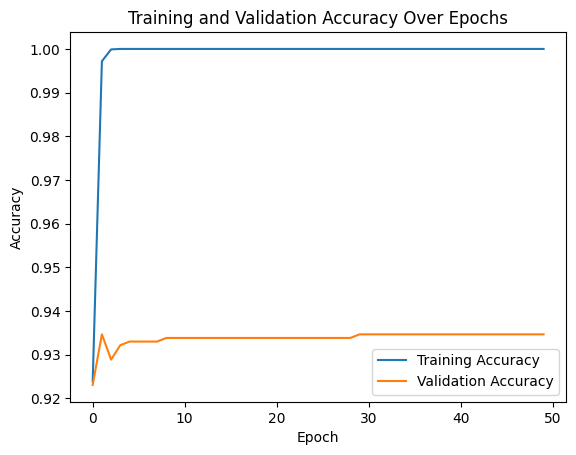

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Conclusion

**Logistic Regressio**

Training Accuracy: 96.70%
Testing Accuracy: 99.01%
Confusion Matrix:
lua
Copy code
[[1379, 5],
 [10, 118]]
Classification Report: Precision, recall, and F1-score are high for both classes.

**Decision Tree Classifier**

Training Accuracy: 100%
Testing Accuracy: 100%
Confusion Matrix:
lua
Copy code
[[1389, 0],
 [0, 123]]
Classification Report: Perfect precision, recall, and F1-score for both classes.


**Random Forest Classifier**

Training Accuracy: 100%
Testing Accuracy: 100%
Confusion Matrix:
lua
Copy code
[[1389, 0],
 [0, 123]]
Classification Report: Perfect precision, recall, and F1-score for both classes.


**Gaussian Naive Bayes**

Training Accuracy: 60.13%
Testing Accuracy: 31.28%
Confusion Matrix:
lua
Copy code
[[355, 5],
 [1034, 118]]
Classification Report: Low precision, recall, and F1-score for the positive class.


**K-Nearest Neighbors**

Training Accuracy: 98.51%
Testing Accuracy: 96.69%
Confusion Matrix:
lua
Copy code
[[1346, 7],
 [43, 116]]
Classification Report: High precision, recall, and F1-score for both classes.


**Gradient Boosting Classifier**

Training Accuracy: 99.95%
Testing Accuracy: 100%
Confusion Matrix:
lua
Copy code
[[1389, 0],
 [0, 123]]
Classification Report: Perfect precision, recall, and F1-score for both classes.


**XGBoost Classifier**

Training Accuracy: 100%
Testing Accuracy: 99.93%
Confusion Matrix:
lua
Copy code
[[1388, 0],
 [1, 123]]
Classification Report: High precision, recall, and F1-score for both classes.
Conclusion:

**The Decision Tree, Random Forest, Gradient Boosting, and XGBoost classifiers achieved perfect accuracy on both training and testing sets.
Logistic Regression also performed exceptionally well.
Gaussian Naive Bayes had lower accuracy and is less suitable for this task.
K-Nearest Neighbors performed well but slightly lower compared to the ensemble methods.
The choice between the top-performing models (Decision Tree, Random Forest, Gradient Boosting, and XGBoost) may depend on other factors like interpretability, training time, and ease of use**

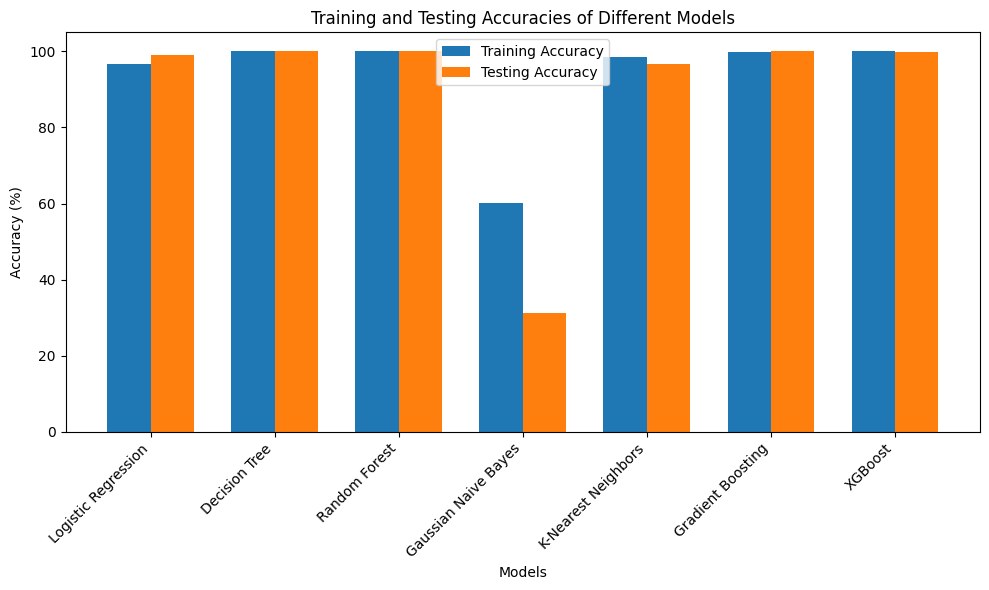

In [34]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Gradient Boosting', 'XGBoost']
training_accuracies = [96.70, 100.00, 100.00, 60.13, 98.51, 99.95, 100.00]
testing_accuracies = [99.01, 100.00, 100.00, 31.28, 96.69, 100.00, 99.93]

# Create an index array for x-axis ticks
ind = np.arange(len(model_names))

# Plotting training and testing accuracies
plt.figure(figsize=(10, 6))
width = 0.35  # the width of the bars

plt.bar(ind - width/2, training_accuracies, width, label='Training Accuracy')
plt.bar(ind + width/2, testing_accuracies, width, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies of Different Models')
plt.xticks(ind, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# LogisticRegression
rndom_lr={'penalty':['l1','l2'],'C':[1.0,2.0,0.1,0.4,3.0],'solver':['lbfgs','sag','cg']}

# DecisionTreeClassifier
rndom_dtc={'criterion':['gini', "entropy"],'splitter':["best", "random"],
    'min_samples_split':[2,4,6,7,9,10,24,20],
    'min_samples_leaf' :[1,2,3,4,5,6]}

# RandomForestClassifier
rndm_rfc={ 'n_estimators':[100,200,300,400,150,250],'criterion':['gini', "entropy"],'min_samples_split':[2,4,6,7,9,10,24,20],
    'min_samples_leaf' :[1,2,3,4,5,6]}

# SVC
rndm_svc={'C':[1.0,],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'gamma':['scale', 'auto']}

# KNeighborsClassifier
rndm_knc={'n_neighbors':[5,4,3,2,1,9,8],'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[2,1],
    'metric':['minkowski','manhatan']}

# GradientBoostingClassifier
rndm_gbc={'loss':['deviance', 'exponential'],'learning_rate':[0.1,0.2,0.3,0.4],
    'n_estimators':[100,200,300,400,500,600]}

\random_lr=RandomizedSearchCV(estimator=lr,param_distributions=rndom_lr,cv=5)
random_dtc=RandomizedSearchCV(estimator=dtc,param_distributions=rndom_dtc,cv=5)
random_rfc=RandomizedSearchCV(estimator=rfc,param_distributions=rndm_rfc,cv=5)
random_svc=RandomizedSearchCV(estimator=svc,param_distributions=rndm_svc,cv=5)
random_knn=RandomizedSearchCV(estimator=knn,param_distributions=rndm_knc,cv=5)
random_gbc=RandomizedSearchCV(estimator=gbc,param_distributions=rndm_gbc,cv=5)
gnb=GaussianNB()

In [ ]:
test_data = [
    {"step": 45, "type": "TRANSFER", "amount": 213983.59, "nameOrig": "C286239409", "oldbalanceOrg": 213983.59, "newbalanceOrig": 0, "nameDest": "C151804423", "oldbalanceDest": 0, "newbalanceDest": 0, "isFraud": 1},
    # Add more instances as needed
]

In [ ]:
X_test_data = pd.DataFrame(test_data)
y_true_data = X_test_data["isFraud"]
X_test_data = X_test_data.drop("isFraud", axis=1)

In [ ]:
X_test_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,45,TRANSFER,213983.59,C286239409,213983.59,0,C151804423,0,0


In [ ]:
y_true_data

0    1
Name: isFraud, dtype: int64

In [ ]:
y_pred_data = model.predict(X_test_data)

ValueError: ignored